**Seeding for reproducibility**

In [1]:
!pip install tensorflow

In [2]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [4]:
!pip install kaggle

In [5]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 50F7-4FC6

 Directory of C:\Users\USER\Downloads\plant-disease-prediction-cnn-deep-leanring-project-main-master\plant-disease-prediction-cnn-deep-leanring-project-main-master\model_training_notebook

02/17/2026  01:49 PM    <DIR>          .
02/17/2026  01:49 PM    <DIR>          ..
02/16/2026  01:46 PM    <DIR>          .ipynb_checkpoints
02/17/2026  11:25 AM                69 kaggle.json
02/17/2026  11:45 AM    <DIR>          plantvillage dataset
10/28/2019  12:25 PM     2,189,386,419 plantvillage-dataset.zip
02/17/2026  01:49 PM           356,708 Plant_Disease_Prediction_CNN_Image_Classifier.ipynb
               3 File(s)  2,189,743,196 bytes
               4 Dir(s)  10,788,708,352 bytes free


In [6]:
kaggle_credentails = json.load(open("kaggle.json"))

In [7]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [8]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 50F7-4FC6

 Directory of C:\Users\USER\Downloads\plant-disease-prediction-cnn-deep-leanring-project-main-master\plant-disease-prediction-cnn-deep-leanring-project-main-master\model_training_notebook

02/17/2026  01:49 PM    <DIR>          .
02/17/2026  01:49 PM    <DIR>          ..
02/16/2026  01:46 PM    <DIR>          .ipynb_checkpoints
02/17/2026  11:25 AM                69 kaggle.json
02/17/2026  11:45 AM    <DIR>          plantvillage dataset
10/28/2019  12:25 PM     2,189,386,419 plantvillage-dataset.zip
02/17/2026  01:49 PM           356,708 Plant_Disease_Prediction_CNN_Image_Classifier.ipynb
               3 File(s)  2,189,743,196 bytes
               4 Dir(s)  10,788,708,352 bytes free


In [2]:
import os
os.makedirs("C:/plantdata", exist_ok=True)


In [3]:
print(os.listdir("C:/plantdata/plantvillage dataset"))


print(len(os.listdir("C:/plantdata/plantvillage dataset/segmented")))
print(os.listdir("C:/plantdata/plantvillage dataset/segmented")[:5])

print(len(os.listdir("C:/plantdata/plantvillage dataset/color")))
print(os.listdir("C:/plantdata/plantvillage dataset/color")[:5])

print(len(os.listdir("C:/plantdata/plantvillage dataset/grayscale")))
print(os.listdir("C:/plantdata/plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


**Number of Classes = 38**

In [4]:
print(len(os.listdir("C:/plantdata/plantvillage dataset/color/Grape___healthy")))
print(os.listdir("C:/plantdata/plantvillage dataset/color/Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


**Data Preprocessing**

In [5]:
# Dataset Path
base_dir = 'C:/plantdata/plantvillage dataset/color'

(256, 256, 3)


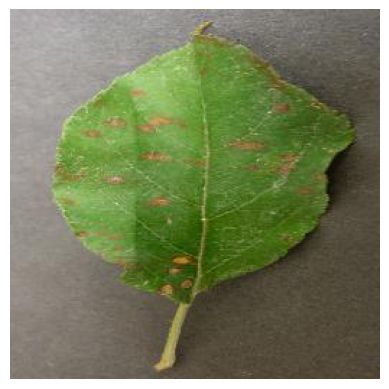

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'C:/plantdata/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [7]:
image_path = 'C:/plantdata/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [8]:
# Image Parameters
img_size = 128
batch_size = 32

**Train Test Split**

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [10]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [11]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network**

In [13]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [14]:
# model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,397,222 (28.22 MB)

 Trainable params: 7,397,222 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [16]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=2,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/2
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1939s 1s/step - accuracy: 0.7087 - loss: 1.0195 - val_accuracy: 0.8412 - val_loss: 0.5166
Epoch 2/2
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1237s 911ms/step - accuracy: 0.8915 - loss: 0.3475 - val_accuracy: 0.8560 - val_loss: 0.4400


**Model Evaluation**

In [17]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 74s 219ms/step - accuracy: 0.8561 - loss: 0.4396
Validation Accuracy: 85.61%


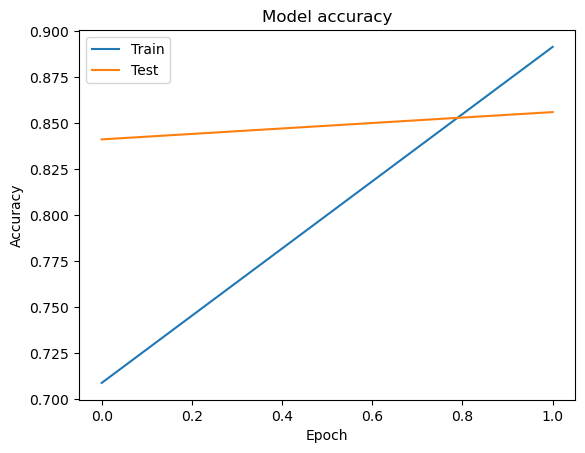

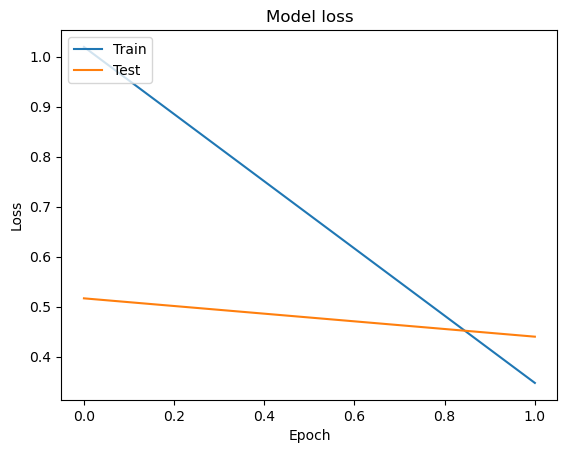

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [48]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [49]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [50]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [51]:
import json

# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [52]:
import os

folder = "C:/plantdata/plantvillage dataset/color/Apple___Black_rot"
print(os.listdir(folder)[:5])


['0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG', '00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG', '0139bc6d-391c-4fd1-bcae-cc74dabfddd7___JR_FrgE.S 2734.JPG', '0199a733-6d3f-4e66-a903-2d1d34457871___JR_FrgE.S 3079.JPG', '01e94c43-0879-4e8c-9b61-c48cfed88dab___JR_FrgE.S 3024.JPG']


In [53]:
from PIL import Image
import numpy as np   
# Example Usage

image_path = 'C:/Users/USER/Downloads/plant-disease-prediction-cnn-deep-leanring-project-main-master/plant-disease-prediction-cnn-deep-leanring-project-main-master/test_images/RS_Rust 1563.JPEG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
Predicted Class Name: Corn_(maize)___Common_rust_


**Save the model to Google drive or local**

In [61]:
model.save('drive/MyDrive/Youtube/trained_models/plant_disease_prediction_model.h5')

In [62]:
model.save('plant_disease_prediction_model.h5')

In [59]:
!pip install streamlit tensorflow pillow numpy google-generativeai

  Using cached google_generativeai-0.8.6-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_ai_generativelanguage-0.6.15-py3-none-any.whl.metadata (5.7 kB)
  Using cached google_api_python_client-2.190.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached grpcio_status-1.78.0-py3-none-any.whl.metadata (1.3 kB)
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
  Using cached grpcio_status-1.76.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached grpcio_status-1.75.1-py3-none-any.whl.metadata (1.1 kB)
  Using cached grpcio_status-1.75.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached grpcio_status-1.74.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached grpcio_status-1.73.1-py3-none-any.whl.metadata (1.1 kB)
  Using cached grpcio_status-1.73.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached grpcio_status-1.72.2-py3-none-any.whl.metadata (1.1 kB)
INFO: pip is still looking at multipl